# Pipeline de Pré-Processamento

Este notebook demonstra o pipeline completo aplicado ao conjunto de dados das diretrizes da OMS.
Ele abrange: carregamento de texto, limpeza, tokenização, lematização, remoção de palavras irrelevantes, vetorização (BoW e TF-IDF) e uma breve exploração visual.

## Carregamento do Dataset

In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\gonsa\OneDrive\Desktop\chatbot\etapa_i\icvs_dataset.csv")
df.head()


,section,text
0,Welcome Message,Welcome to ICVS!
1,Welcome Message,We’re excited to have you join our community o...
2,Welcome Message,"Together, we strive to conduct research of exc..."
3,Welcome Message,Welcome aboard!
4,Introduction,This guidebook was designed to facilitate your...


## Importaçao de bibliotecas

In [2]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns


nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gonsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\gonsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gonsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gonsa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\gonsa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Limpeza Textual
Aqui convertemos tudo para minúsculas, removemos pontuação, números e espaços extras.

In [3]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_text'] = df['text'].apply(clean_text)
df[['text', 'clean_text']].head()

,text,clean_text
0,Welcome to ICVS!,welcome to icvs
1,We’re excited to have you join our community o...,were excited to have you join our community of...
2,"Together, we strive to conduct research of exc...",together we strive to conduct research of exce...
3,Welcome aboard!,welcome aboard
4,This guidebook was designed to facilitate your...,this guidebook was designed to facilitate your...


## Tokenização e Lematização

A tokenização divide o texto em palavras.
A lematização reduz cada palavra à sua forma base (por exemplo, infecções → infecção).

In [4]:
lemmatizer = WordNetLemmatizer()

def tokenize_and_lemmatize(text):
    if not isinstance(text, str) or text.strip() == "":
        return []  # assim ele ignora valores vazios ou não textuais
    try:
        tokens = word_tokenize(text)
        lemmas = [lemmatizer.lemmatize(tok) for tok in tokens if len(tok) > 2]
        return lemmas
    except Exception as e:
        print(f"Erro ao processar texto: {e}")
        return []

df['tokens'] = df['clean_text'].apply(tokenize_and_lemmatize)
df[['clean_text', 'tokens']].head()


,clean_text,tokens
0,welcome to icvs,"[welcome, icvs]"
1,were excited to have you join our community of...,"[were, excited, have, you, join, our, communit..."
2,together we strive to conduct research of exce...,"[together, strive, conduct, research, excellen..."
3,welcome aboard,"[welcome, aboard]"
4,this guidebook was designed to facilitate your...,"[this, guidebook, wa, designed, facilitate, yo..."


## Remoção de Stopwords

Palavras comuns como «o», «e», «de» são removidas, uma vez que acrescentam pouco significado à análise.

In [5]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [t for t in tokens if t not in stop_words]

df['tokens_nostop'] = df['tokens'].apply(remove_stopwords)
df[['tokens', 'tokens_nostop']].head()

,tokens,tokens_nostop
0,"[welcome, icvs]","[welcome, icvs]"
1,"[were, excited, have, you, join, our, communit...","[excited, join, community, researcher, student..."
2,"[together, strive, conduct, research, excellen...","[together, strive, conduct, research, excellen..."
3,"[welcome, aboard]","[welcome, aboard]"
4,"[this, guidebook, wa, designed, facilitate, yo...","[guidebook, wa, designed, facilitate, arrival,..."


## Representação do Texto - Bag of Words e TF-IDF

- Bag-of-Words (BoW): conta as ocorrências das palavras.

- TF-IDF: pondera as palavras por importância (menos frequentes = mais significativas).

In [6]:
texts = df['tokens_nostop'].apply(lambda x: ' '.join(x))

# Bag of Words
bow_vectorizer = CountVectorizer(max_features=1000)
X_bow = bow_vectorizer.fit_transform(texts)
bow_features = bow_vectorizer.get_feature_names_out()
bow_df = pd.DataFrame(X_bow.toarray(), columns=bow_features)

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = tfidf_vectorizer.fit_transform(texts)
tfidf_features = tfidf_vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_features)

bow_df.head(), tfidf_df.head()

(   able  aboard  abonos  abonosusrhuminhopt  absl  academic  access  \
 0     0       0       0                   0     0         0       0   
 1     0       0       0                   0     0         0       0   
 2     0       0       0                   0     0         0       0   
 3     0       1       0                   0     0         0       0   
 4     0       0       0                   0     0         0       0   
 
    accessing  accommodate  accordance  ...  workspace  world  worldwide  \
 0          0            0           0  ...          0      0          0   
 1          0            0           0  ...          0      0          0   
 2          0            0           0  ...          0      0          0   
 3          0            0           0  ...          0      0          0   
 4          0            0           0  ...          0      0          0   
 
    worry  written  wwwintranetmeduminhopt  year  yearend  yet  young  
 0      0        0                  

## Exploração Visual

C:\Users\gonsa\AppData\Local\Temp\ipykernel_25324\1050105843.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_freq_nostop.values, y=word_freq_nostop.index, palette='Blues_r')


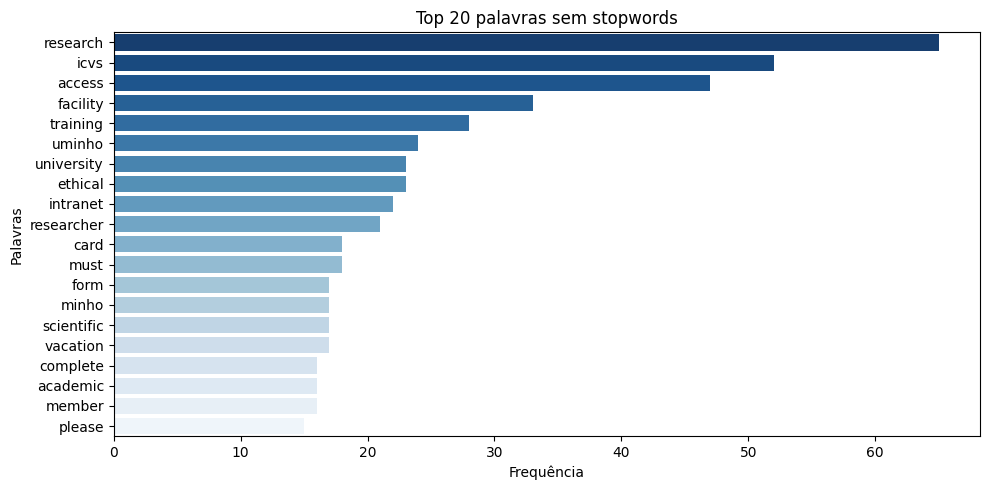

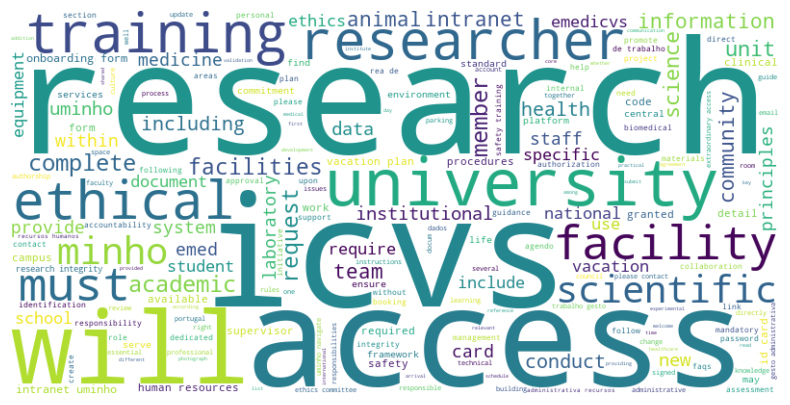

In [7]:
# Word frequency plot sem SW
texts_nostop = df['tokens_nostop'].apply(lambda x: ' '.join(x))
word_freq_nostop = pd.Series(' '.join(texts_nostop).split()).value_counts()[:20]

plt.figure(figsize=(10, 5))
sns.barplot(x=word_freq_nostop.values, y=word_freq_nostop.index, palette='Blues_r')
plt.title('Top 20 palavras sem stopwords')
plt.xlabel('Frequência')
plt.ylabel('Palavras')
plt.tight_layout()
plt.show()



# Word Cloud
wc = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['clean_text']))
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Guardar Resultados

In [10]:
df.to_csv("dataset_processado.csv", index=False, encoding="utf-8")
print("Tá feito o pre-game team")


Tá feito o pre-game team
